## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

## Functions

In [2]:
def standardize_data (df):
    df.columns = list(map(lambda x: x.lower(), df.columns))
    df.columns = list(map(lambda x: x.replace(" ", "_"), df.columns))
    df.rename(columns = {'employmentstatus': 'employment_status'}, inplace = True)
    df[['customer_lifetime_value','total_claim_amount', 'income', 'months_since_last_claim']] = df[['customer_lifetime_value','total_claim_amount', 'income', 'months_since_last_claim']].apply(round,1)
    return df


def identify_nan(df):
    nan_list = df.isnull().sum()
    drop_col = [i for i,v in nan_list.items() if (v/len(df)) > 0.40]
    fillna = [i for i,v in nan_list.items() if ((v/len(df)) > 0.02 and (v/len(df)) < 0.40)]
    for col in fillna:
        if (col == 'number_of_open_complaints'):
            median_oc = df[col].value_counts().idxmax() #Replacing nan by most frequent value
            df[col] = df[col].fillna(median_oc)
        elif (col == 'months_since_last_claim'):
            median_lc = df[col].value_counts().idxmax() #Replacing nan by most frequent value
            df[col] = df[col].fillna(median_lc)
        else:
            df[col] = df[col].fillna('Unknown')
    df = df.drop(drop_col, axis=1)
    print(df.isnull().sum())
    return df


def get_month(df):
    df['month'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    months_list = [df['month'][i].strftime(format="%B") for i in range(len(df['month']))]
    return months_list


def clean_df(df):
    df_copy = df.copy()
    headers_standard = standardize_data(df_copy)
    df_copy = identify_nan(headers_standard)
    df_copy['month'] = get_month(df_copy)
    return df_copy


def log_transform(x):
    if x > 0:
        x = np.log10(x)
        if np.isfinite(x):
            return x
        else:
            return np.NAN
        
def get_displots(df):
    for col in df:
        sns.displot(df[col])
        plt.show()

## Data cleaning

In [3]:
customer_analysis = pd.read_csv('c:/users/ameli/IRONHACK/WEEK_1/DAY_2/AFTERNOON_SESSION/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')
customer_analysis = customer_analysis.drop(['Unnamed: 0'], axis=1)
customer_analysis_clean = clean_df(customer_analysis)
customer_analysis_clean.head(50)

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.0,No,Basic,College,2/18/11,Employed,M,48029.0,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,293.0,Four-Door Car,Medsize,February
1,KX64629,California,2229.0,No,Basic,College,1/18/11,Unemployed,F,0.0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,745.0,Four-Door Car,Medsize,January
2,LZ68649,Washington,14948.0,No,Basic,Bachelor,2/10/11,Employed,M,22139.0,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.0,SUV,Medsize,February
3,XL78013,Oregon,22332.0,Yes,Extended,College,1/11/11,Employed,M,49078.0,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.0,Four-Door Car,Medsize,January
4,QA50777,Oregon,9025.0,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675.0,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,708.0,Four-Door Car,Medsize,January
5,HO81102,Unknown,4745.0,Unknown,Basic,High School or Below,2/14/11,Employed,M,50549.0,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,293.0,Four-Door Car,Medsize,February
6,IW72280,California,5035.0,No,Basic,Doctor,2/14/11,Employed,F,37405.0,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,288.0,Four-Door Car,Medsize,February
7,IH64929,California,4956.0,No,Basic,High School or Below,2/24/11,Employed,M,87197.0,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.0,Two-Door Car,Medsize,February
8,FM55990,California,5990.0,Yes,Premium,College,1/19/11,Employed,M,66839.0,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.0,Sports Car,Medsize,January
9,QX31376,Oregon,17114.0,No,Extended,Master,1/4/11,Employed,F,70961.0,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,408.0,Four-Door Car,Small,January


## Data exploration

Show DataFrame info.

In [4]:
customer_analysis_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employment_status              10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  float64
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

Describe DataFrame.

In [5]:
round(customer_analysis_clean.describe(),1)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.0,10910.0,10910.0,10910.0,10910.0,10910.0,10910.0,10910.0
mean,8018.2,37536.3,93.2,14.4,48.1,0.4,3.0,434.9
std,6885.1,30359.2,34.4,10.2,27.9,0.9,2.4,292.2
min,1898.0,0.0,61.0,0.0,0.0,0.0,1.0,0.0
25%,4014.0,0.0,68.0,5.0,24.0,0.0,1.0,271.0
50%,5771.5,33813.5,83.0,13.0,48.0,0.0,2.0,382.5
75%,8993.0,62250.8,109.0,23.0,71.0,0.0,4.0,547.0
max,83325.0,99981.0,298.0,35.0,99.0,5.0,9.0,2893.0


### Plotting

 Total number of responses

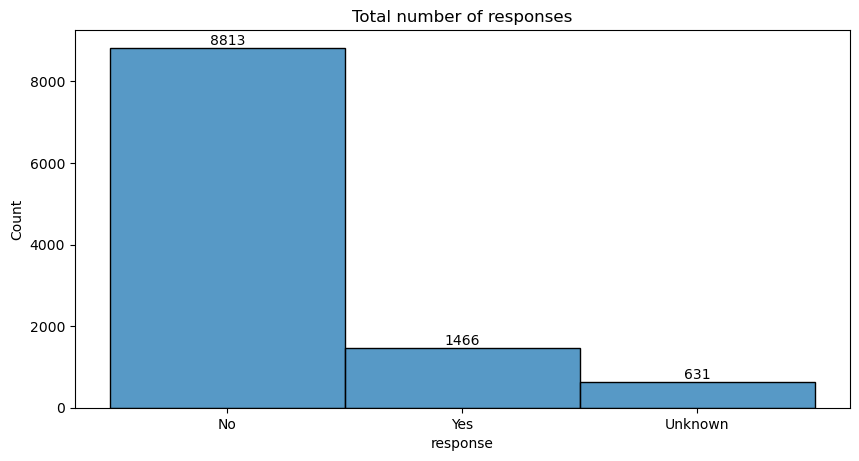

In [6]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 100)
chart = sns.histplot(customer_analysis_clean['response'])
chart.bar_label(chart.containers[0])
plt.title('Total number of responses')

plt.show()

Response rate by the sales channel

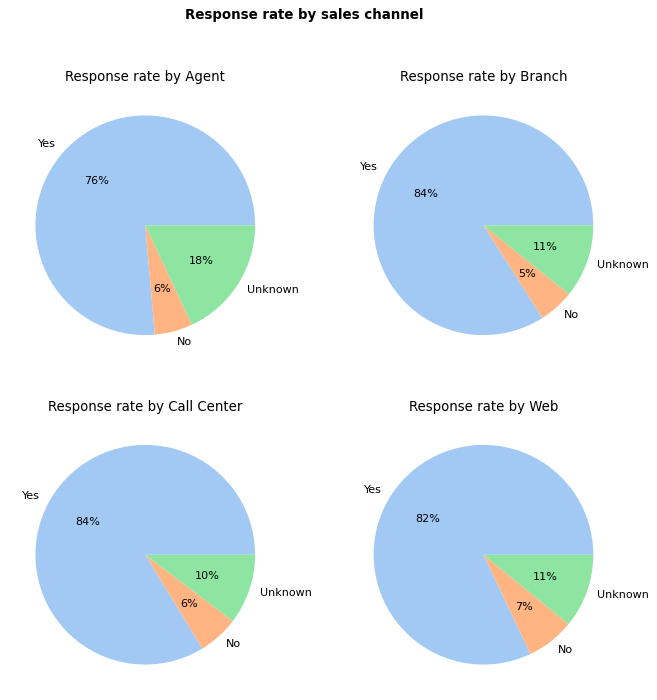

In [7]:
customer_analysis_clean['response'].value_counts()
customer_analysis_clean['sales_channel'].value_counts()

info_rates_dict = customer_analysis_clean.groupby('sales_channel')['response'].value_counts(normalize=True).unstack().to_dict(orient='index')
    
fig, ax = plt.subplots(2, 2, figsize = (10,10), dpi = 80)
labels = ['Yes', 'No', 'Unknown']
colors = sns.color_palette('pastel')
plt.suptitle('Response rate by sales channel').set_fontweight('bold')

# Plotting values
agent = ax[0][0].pie(info_rates_dict['Agent'].values(), labels = labels, colors = colors, autopct = '%0.0f%%')
branch = ax[0][1].pie(info_rates_dict['Branch'].values(),labels = labels, colors = colors, autopct = '%0.0f%%')
call_center = ax[1][0].pie(info_rates_dict['Call Center'].values(),labels = labels, colors = colors, autopct = '%0.0f%%')
web = ax[1][1].pie(info_rates_dict['Web'].values(),labels = labels, colors = colors, autopct = '%0.0f%%')

# Setting titles for every plot
ax[0][0].set_title('Response rate by Agent')
ax[0][1].set_title('Response rate by Branch')
ax[1][0].set_title('Response rate by Call Center')
ax[1][1].set_title('Response rate by Web')

plt.show()

Response rate by the total claim amount

,Intervals,No %,Yes %,Unknown %
0,0-500,81.22,12.74,6.04
1,500-1000,79.63,15.11,5.26
2,1000-1500,78.57,16.50,4.93
3,1500-2000,95.24,0.00,4.76
4,2000-2500,88.89,0.00,11.11
5,2500-3000,100.00,0.00,0.00


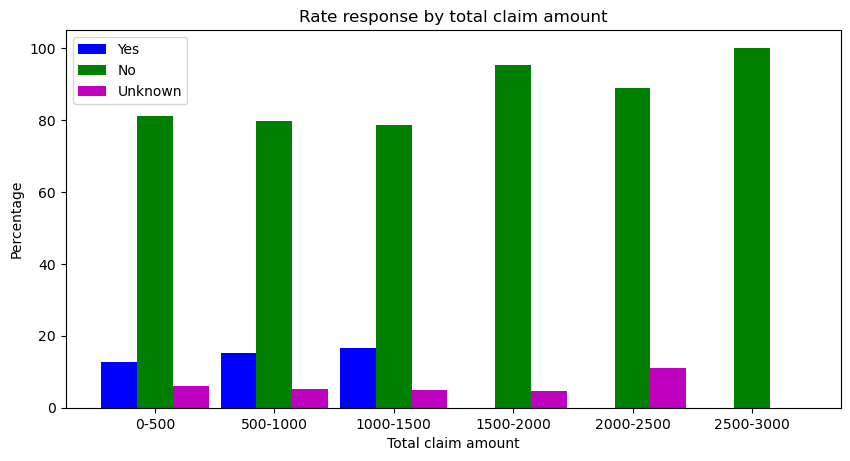

In [8]:
bins = [500, 1000, 1500, 2000, 2500, 3000]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000']
values = []
count = 0

for num in bins:
    filtered = customer_analysis_clean.loc[(customer_analysis_clean['total_claim_amount'] >= count) & (customer_analysis_clean['total_claim_amount'] < num)]
    count = num
    groupedby = filtered.groupby('response')['total_claim_amount'].count().to_dict()
    values.append(groupedby)

new_df = pd.DataFrame(values)
new_df['Intervals'] = labels
new_df = new_df.fillna(0)
new_df['No %'] = new_df['No'] / (new_df['No']+new_df['Yes']+new_df['Unknown'])*100
new_df['Yes %'] = new_df['Yes'] / (new_df['No']+new_df['Yes']+new_df['Unknown'])*100
new_df['Unknown %'] = new_df['Unknown'] / (new_df['No']+new_df['Yes']+new_df['Unknown'])*100
new_df = new_df.drop(['Yes', 'No', 'Unknown'], axis=1)
display(round(new_df,2))

fig, ax = plt.subplots(figsize = (10,5), dpi=100)
x_axis = np.arange(len(labels))
plt.bar(x_axis-0.3, new_df['Yes %'], width=0.3, label = 'Yes', color = 'b')
plt.bar(x_axis, new_df['No %'], width=0.3, label = 'No', color = 'g')
plt.bar(x_axis+0.3, new_df['Unknown %'], width=0.3, label = 'Unknown', color = 'm')

plt.title('Rate response by total claim amount')
plt.xlabel("Total claim amount", size = 10,)
plt.ylabel("Percentage", size = 10)
plt.xticks(x_axis, labels)
plt.legend()

plt.show()

Response rate by income

,Intervals,No %,Yes %,Unknown %
0,0-20.000,66.77,28.48,4.75
1,20.000-40.000,75.52,19.05,5.43
2,40.000-60.000,77.99,16.63,5.38
3,60.000-80.000,78.16,16.12,5.72
4,80.000-100.000,79.05,15.27,5.69


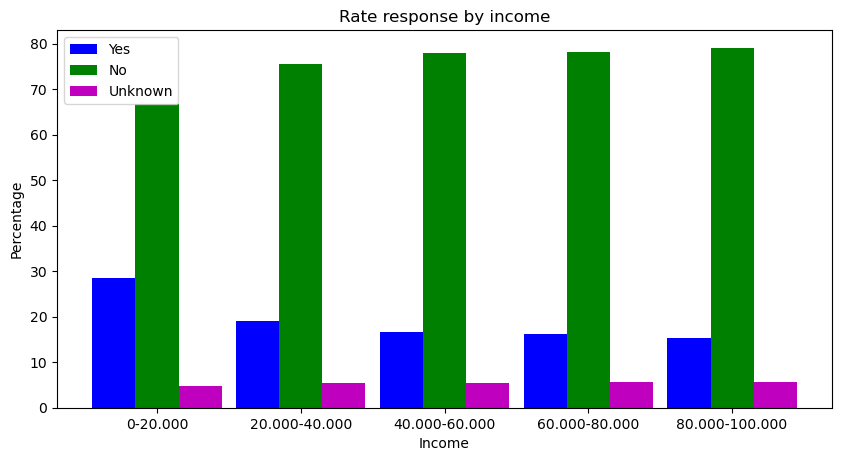

In [9]:
bins_income = [20000, 40000, 60000, 80000, 100000]
labels_income = ['0-20.000', '20.000-40.000', '40.000-60.000', '60.000-80.000', '80.000-100.000']
values_income = []
count_income = 0

for num in bins_income:
    filtered_income = customer_analysis_clean.loc[(customer_analysis_clean['income'] >= count) & (customer_analysis_clean['income'] < num)]
    count_income = num
    groupedby_income = filtered_income.groupby('response')['income'].count().to_dict()
    values_income.append(groupedby_income)

new_income_df = pd.DataFrame(values_income)
new_income_df['Intervals'] = labels_income
new_income_df = new_income_df.fillna(0)
new_income_df['No %'] = new_income_df['No'] / (new_income_df['No']+new_income_df['Yes']+new_income_df['Unknown'])*100
new_income_df['Yes %'] = new_income_df['Yes'] / (new_income_df['No']+new_income_df['Yes']+new_income_df['Unknown'])*100
new_income_df['Unknown %'] = new_income_df['Unknown'] / (new_income_df['No']+new_income_df['Yes']+new_income_df['Unknown'])*100
new_income_df = new_income_df.drop(['Yes', 'No', 'Unknown'], axis=1)
display(round(new_income_df,2))

fig, ax = plt.subplots(figsize = (10,5), dpi=100)
x_axis_income = np.arange(len(labels_income))
plt.bar(x_axis_income-0.3, new_income_df['Yes %'], width=0.3, label = 'Yes', color = 'b')
plt.bar(x_axis_income, new_income_df['No %'], width=0.3, label = 'No', color = 'g')
plt.bar(x_axis_income+0.3, new_income_df['Unknown %'], width=0.3, label = 'Unknown', color = 'm')

plt.title('Rate response by income')
plt.xlabel("Income", size = 10,)
plt.ylabel("Percentage", size = 10)
plt.xticks(x_axis_income, labels_income)
plt.legend(loc='upper left')

plt.show()

### Numerical and categorical features

In [10]:
numerical = customer_analysis_clean.select_dtypes([np.number]).reset_index(drop = True)
categorical = customer_analysis_clean.select_dtypes('object').reset_index(drop = True)
print(numerical.columns)
print(categorical.columns)

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')
Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'month'],
      dtype='object')


## Processing data


### Checking multicollinearity between numerical features
#### Feature to predict: total_claim_amount

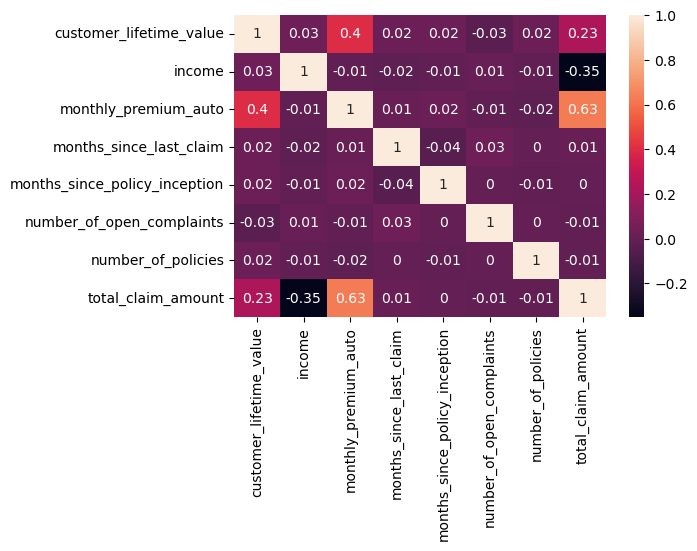

In [11]:
correlations_matrix = round(numerical.corr(),2)
fig, ax = plt.subplots(dpi=100)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [12]:
display(correlations_matrix)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.03,0.40,0.02,0.02,-0.03,0.02,0.23
income,0.03,1.00,-0.01,-0.02,-0.01,0.01,-0.01,-0.35
monthly_premium_auto,0.40,-0.01,1.00,0.01,0.02,-0.01,-0.02,0.63
months_since_last_claim,0.02,-0.02,0.01,1.00,-0.04,0.03,0.00,0.01
months_since_policy_inception,0.02,-0.01,0.02,-0.04,1.00,0.00,-0.01,0.00
number_of_open_complaints,-0.03,0.01,-0.01,0.03,0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.02,0.00,-0.01,0.00,1.00,-0.01
total_claim_amount,0.23,-0.35,0.63,0.01,0.00,-0.01,-0.01,1.00


### Encoding categorical features

In [13]:
categorical_to_label = categorical.copy()
categorical_to_label = categorical.astype('category')

For this exercise, we're going to select some cols that could be useful for our model and apply label encoder. Keeping in mind that our objective is to understand customer demographics and buying behavior in order to take targeted actions to increase profitable customer response, retention, and growth, for our model we will select and label the following columns:

In [14]:
# Initiate LabelEncoder instance
labelencoder = LabelEncoder()
categorical_model = categorical_to_label.copy()

categorical_model['state_cat'] = labelencoder.fit_transform(categorical_model['state'])
categorical_model['response_cat'] = labelencoder.fit_transform(categorical_model['response'])
categorical_model['coverage_cat'] = labelencoder.fit_transform(categorical_model['coverage'])
categorical_model['education_cat'] = labelencoder.fit_transform(categorical_model['education'])
categorical_model['employment_status_cat'] = labelencoder.fit_transform(categorical_model['employment_status'])
categorical_model['gender_cat'] = labelencoder.fit_transform(categorical_model['gender'])
categorical_model['location_code_cat'] = labelencoder.fit_transform(categorical_model['location_code'])
categorical_model['marital_status_cat'] = labelencoder.fit_transform(categorical_model['marital_status'])
categorical_model['policy_type_cat'] = labelencoder.fit_transform(categorical_model['policy_type'])
categorical_model['sales_channel_cat'] = labelencoder.fit_transform(categorical_model['sales_channel'])
categorical_model['vehicle_class_cat'] = labelencoder.fit_transform(categorical_model['vehicle_class'])

# Drop original cols and the ones we won't use in our model
categorical_model = categorical_model.drop(['state','response', 'coverage', 'education', 'employment_status',
                                             'gender', 'location_code', 'marital_status', 'policy_type',
                                             'sales_channel', 'vehicle_class', 'customer', 'effective_to_date',
                                             'policy', 'renew_offer_type', 'vehicle_size','month'], axis=1)

display(categorical_model)

,state_cat,response_cat,coverage_cat,education_cat,employment_status_cat,gender_cat,location_code_cat,marital_status_cat,policy_type_cat,sales_channel_cat,vehicle_class_cat
0,0,0,0,1,1,1,1,1,0,0,0
1,1,0,0,1,4,0,1,2,1,2,0
2,5,0,0,0,1,1,1,2,1,2,3
3,3,2,1,1,1,1,1,2,0,1,0
4,3,0,2,0,2,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10905,2,0,2,0,4,0,1,1,1,3,1
10906,3,0,0,1,1,0,2,1,1,1,0
10907,0,0,1,0,1,0,0,1,0,3,2
10908,1,0,2,1,1,0,2,0,1,1,3


## Let's check correlation again

In [15]:
x_values = numerical.join(categorical_model)
x_values

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_cat,response_cat,coverage_cat,education_cat,employment_status_cat,gender_cat,location_code_cat,marital_status_cat,policy_type_cat,sales_channel_cat,vehicle_class_cat
0,4809.0,48029.0,61,7.0,52,0.0,9,293.0,0,0,0,1,1,1,1,1,0,0,0
1,2229.0,0.0,64,3.0,26,0.0,1,745.0,1,0,0,1,4,0,1,2,1,2,0
2,14948.0,22139.0,100,34.0,31,0.0,2,480.0,5,0,0,0,1,1,1,2,1,2,3
3,22332.0,49078.0,97,10.0,3,0.0,2,484.0,3,2,1,1,1,1,1,2,0,1,0
4,9025.0,23675.0,117,3.0,31,0.0,7,708.0,3,0,2,0,2,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.0,0.0,253,3.0,40,0.0,7,1214.0,2,0,2,0,4,0,1,1,1,3,1
10906,5259.0,61146.0,65,7.0,68,0.0,6,273.0,3,0,0,1,1,0,2,1,1,1,0
10907,23893.0,39837.0,201,11.0,63,0.0,2,381.0,0,0,1,0,1,0,0,1,0,3,2
10908,11972.0,64195.0,158,0.0,27,4.0,6,618.0,1,0,2,1,1,0,2,0,1,1,3


In [16]:
set_1 = x_values[['customer_lifetime_value', 'income', 'monthly_premium_auto', 
                  'months_since_last_claim', 'months_since_policy_inception', 
                  'total_claim_amount']]

set_2 = x_values[['number_of_open_complaints', 'number_of_policies', 
                  'state_cat', 'response_cat', 'total_claim_amount']]

set_3 = x_values[['coverage_cat', 'education_cat', 'employment_status_cat', 
                  'gender_cat', 'location_code_cat', 'total_claim_amount']]

set_4 = x_values[['marital_status_cat', 'policy_type_cat', 'sales_channel_cat', 
                  'vehicle_class_cat', 'total_claim_amount']]

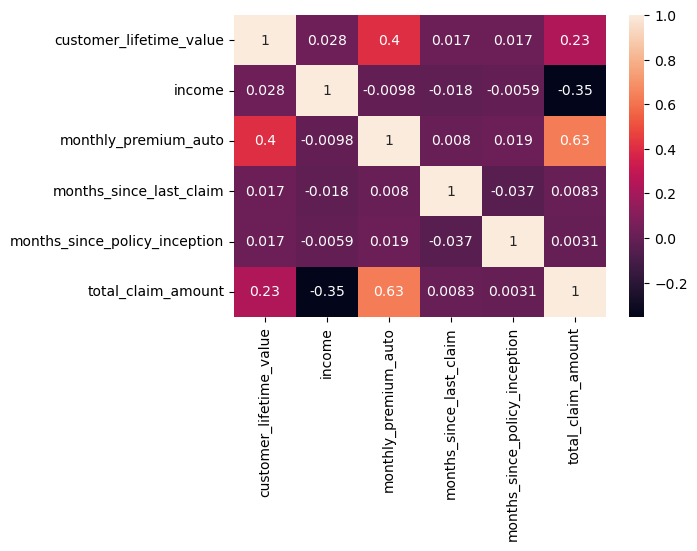

In [17]:
matrix_1 = set_1.corr()
fig, ax = plt.subplots(dpi=100)
sns.heatmap(matrix_1, annot=True)
plt.show()

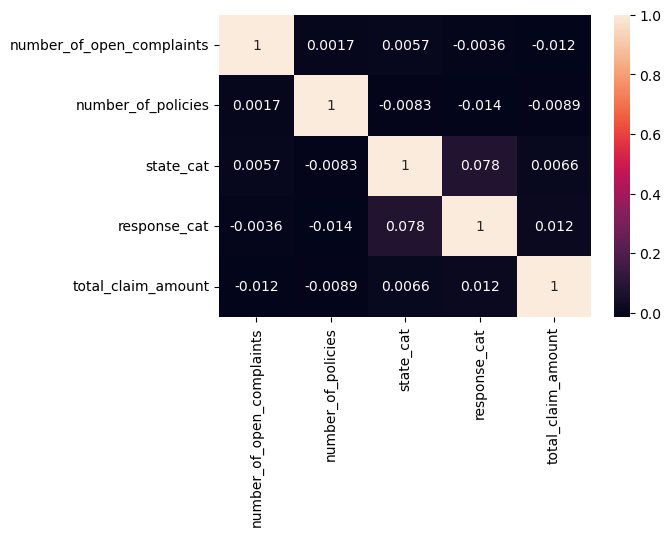

In [18]:
matrix_2 = set_2.corr()
fig, ax = plt.subplots(dpi=100)
sns.heatmap(matrix_2, annot=True)
plt.show()

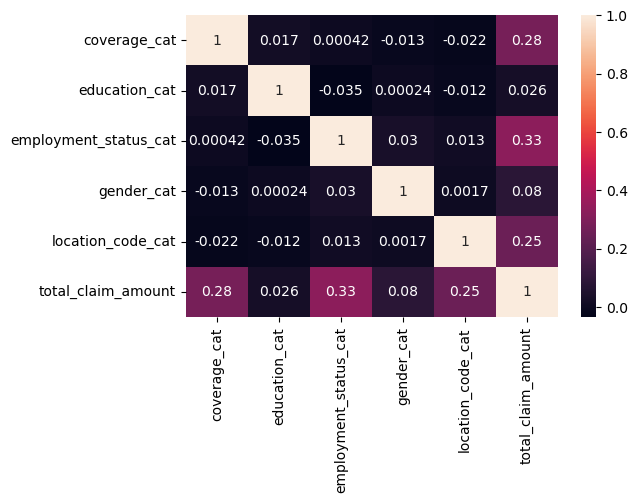

In [19]:
matrix_3 = set_3.corr()
fig, ax = plt.subplots(dpi=100)
sns.heatmap(matrix_3, annot=True)
plt.show()

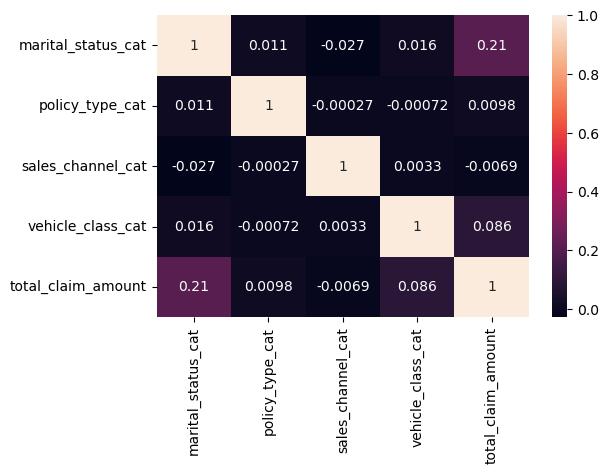

In [20]:
matrix_4 = set_4.corr()
fig, ax = plt.subplots(dpi=100)
sns.heatmap(matrix_4, annot=True)
plt.show()

### Linear Regression

#### X-y split

Features more correlated to interceptor 'total_claim_amount' are 'monthly_premium_auto' (strong correlation: 0.63), followed by 'income' (weak correlation: 0.35) and 'employmet_status_cat' (also weak correlation: 0.33). From previous analysis, we've decided to use the 3 features in our linear model.

In [21]:
y = x_values['total_claim_amount']
X = x_values[["monthly_premium_auto","income", 'employment_status_cat']]

**Distribution and scale**

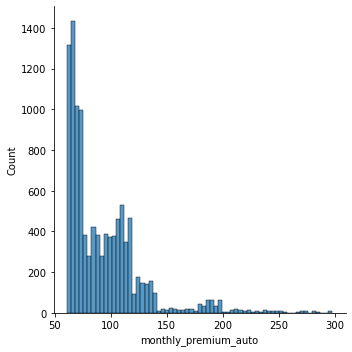

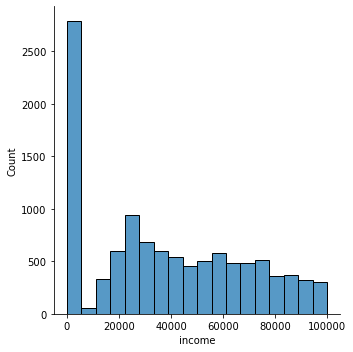

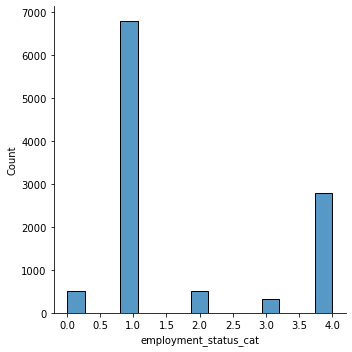

In [22]:
# Check distribution
get_displots(X)

In [23]:
# Applying MinMaxScaler
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
x_norm_df = pd.DataFrame(x_normalized, columns=X.columns)
x_norm_df

(10910, 3)


,monthly_premium_auto,income,employment_status_cat
0,0.000000,0.480381,0.25
1,0.012658,0.000000,1.00
2,0.164557,0.221432,0.25
3,0.151899,0.490873,0.25
4,0.236287,0.236795,0.50
...,...,...,...
10905,0.810127,0.000000,1.00
10906,0.016878,0.611576,0.25
10907,0.590717,0.398446,0.25
10908,0.409283,0.642072,0.25


In [24]:
# Applying PowerTransformer to scaled data
pt = PowerTransformer(method = 'yeo-johnson')
pt.fit(X)
pt_data = pt.transform(X)
X_pt_df = pd.DataFrame(pt_data, columns= X.columns)
X_pt_df

,monthly_premium_auto,income,employment_status_cat
0,-1.542363,0.590530,-0.490501
1,-1.256898,-1.634637,1.436268
2,0.629792,0.142576,-0.490501
3,0.536273,0.604438,-0.490501
4,1.051069,0.177735,0.447674
...,...,...,...
10905,2.153457,-1.634637,1.436268
10906,-1.168860,0.750719,-0.490501
10907,1.942876,0.473529,-0.490501
10908,1.631253,0.784301,-0.490501


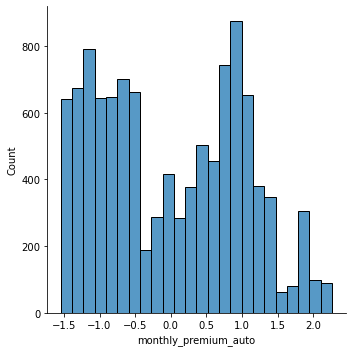

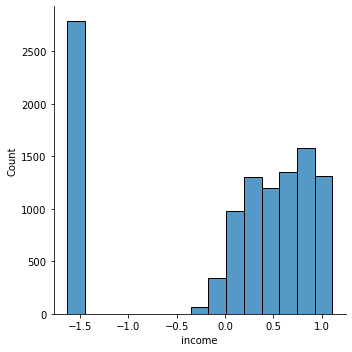

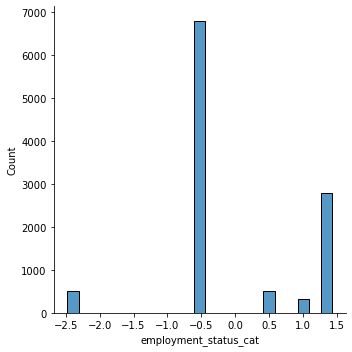

In [25]:
# Checking distribution of transformed data
get_displots(X_pt_df)

**Linear Model with monthly_premium_auto, income and employment_status_cat**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [27]:
lm_1 = linear_model.LinearRegression()
lm_1.fit(X_train,y_train)

y_pred_train = lm_1.predict(X_train)
y_pred_test = lm_1.predict(X_test)

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)

print('Training set performance')
print("R2 score is:", r2_score(y_train, y_pred_train))
print("MSE is:", mean_squared_error(y_train, y_pred_train))
print("RMSE is:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE is:", mean_absolute_error(y_train, y_pred_train))
print("MAPE is:", mean_absolute_percentage_error(y_train, y_pred_train))

print("------------------------")

print('Test set performance')
print("R2 score is:", r2_score(y_test, y_pred_test))
print("MSE is:", mean_squared_error(y_test, y_pred_test))
print("RMSE is:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE is:", mean_absolute_error(y_test, y_pred_test))
print("MAPE is:", mean_absolute_percentage_error(y_test, y_pred_test))

Training set performance
R2 score is: 0.525666632226206
MSE is: 39850.79805723532
RMSE is: 199.6266466612995
MAE is: 143.79539860373387
MAPE is: 621974372042910.5
------------------------
Test set performance
R2 score is: 0.5569528778599582
MSE is: 40192.09614182545
RMSE is: 200.47966515790435
MAE is: 145.2876966615059
MAPE is: 429667380975856.44


In [28]:
results_train = pd.DataFrame(y_train).copy()
results_train['y_pred'] = y_pred_train
results_train['residuals'] = results_train['total_claim_amount'] - results_train['y_pred']
results_train.head()

,total_claim_amount,y_pred,residuals
4556,442.0,352.940360,89.059640
9677,345.0,441.375682,-96.375682
6174,18.0,599.208373,-581.208373
6663,857.0,730.735615,126.264385
2532,365.0,504.508758,-139.508758


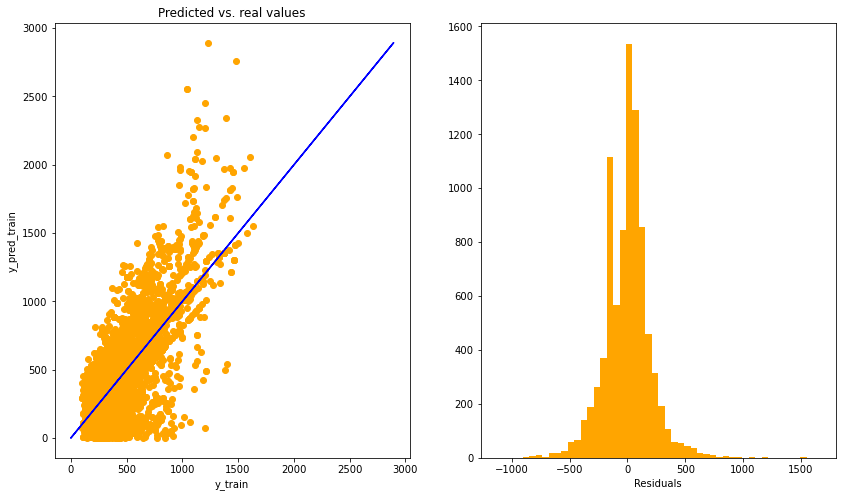

In [29]:
fig, ax = plt.subplots(1,2,figsize=(14,8))
ax[0].scatter(x=results_train['y_pred'], y=results_train['total_claim_amount'] , color = 'orange')
ax[0].plot(results_train['total_claim_amount'], results_train['total_claim_amount'], color = 'blue')
ax[0].set_xlabel("y_train")
ax[0].set_ylabel("y_pred_train")
ax[0].set_title("Predicted vs. real values")
ax[1].hist(results_train['residuals'], color = "orange", bins = 50)
ax[1].set_xlabel("Residuals")
plt.show()